<a href="https://colab.research.google.com/github/Cill19/Python-for-Data-Analyst/blob/main/Project_Plan_Profesional_%E2%80%93_%E2%80%9CDashboard_Digital_Payment_System%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preparation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1200)

In [7]:
file_path = "/content/Transaction Records Dataset from a Digital Payment System.xlsx"

DATA UNDERSTANDING AND DATA CLEANING

In [9]:
df = pd.read_excel(file_path)
print("Shape dataset:", df.shape)
print(df.head())
print(df.info())

Shape dataset: (15060, 24)
   id  customer_id  phone_number  reference_number              partner_reference_number    capture_number                        receipt_number                                               note                                             detail currency  net_amount  fee_internal_amount  fee_external_amount    type journal_type         category  status                          paying_at channel              channel_reference_number  is_verified                         created_at                         updated_at  created_by
0   1        28273   81334122111  INV-241101080631  752a1e6e-e1e4-4b52-8294-6cb44e2e1330  INV-241101080631  dc808a93-29c0-4e82-ae1c-a7b2737a333d  Top Up Bilpay E-wallet - rezalbasalamah@gmail.com  Top Up Bilpay E-wallet - rezalbasalamah@gmail.com      IDR      200000                  500                 4000  TOP_UP       CREDIT      VA_BANK_BRI       0  2024-11-02 00:00:00.000000 +00:00  DUITKU  810d30ea-7345-4a8a-a7aa-ca6335dae3ba     

In [10]:
#konversi kolom tanggal
date_cols = ["paying_at", "created_at", "updated_at"]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [11]:
#Membuat kolom turunan (date, month, day, hour)
df["date"] = df["created_at"].dt.date
df["month"] = df["created_at"].dt.to_period("M")
df["day_name"] = df["created_at"].dt.day_name()
df["hour"] = df["created_at"].dt.hour

/tmp/ipython-input-1538026768.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["created_at"].dt.to_period("M")


In [12]:
#Menampilkan tipe data setelah diperbaiki
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   id                        15060 non-null  int64              
 1   customer_id               15060 non-null  int64              
 2   phone_number              15060 non-null  int64              
 3   reference_number          15060 non-null  object             
 4   partner_reference_number  15060 non-null  object             
 5   capture_number            15060 non-null  object             
 6   receipt_number            15060 non-null  object             
 7   note                      15060 non-null  object             
 8   detail                    15060 non-null  object             
 9   currency                  15060 non-null  object             
 10  net_amount                15060 non-null  int64              
 11  fee_internal_am

In [14]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [15]:
#cek duplikasi
duplicate_rows = df.duplicated().sum()
print("Jumlah duplikasi:", duplicate_rows)

Jumlah duplikasi: 1027


In [16]:
df = df.drop_duplicates()

In [17]:
#cek missing values
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
id                          0
customer_id                 0
phone_number                0
reference_number            0
partner_reference_number    0
capture_number              0
receipt_number              0
note                        0
detail                      0
currency                    0
net_amount                  0
fee_internal_amount         0
fee_external_amount         0
type                        0
journal_type                0
category                    0
status                      0
paying_at                   0
channel                     0
channel_reference_number    0
is_verified                 0
created_at                  0
updated_at                  0
created_by                  0
date                        0
month                       0
day_name                    0
hour                        0
dtype: int64


In [18]:
#statistik awal untuk deteksi outlier
print("\nDescribe numeric columns:")
print(df[['net_amount', 'fee_internal_amount', 'fee_external_amount']].describe())


Describe numeric columns:
         net_amount  fee_internal_amount  fee_external_amount
count  1.403300e+04              14033.0              14033.0
mean   5.507869e+05                500.0               4000.0
std    1.045683e+06                  0.0                  0.0
min    1.000000e+04                500.0               4000.0
25%    5.000000e+04                500.0               4000.0
50%    1.500000e+05                500.0               4000.0
75%    5.500000e+05                500.0               4000.0
max    1.000000e+07                500.0               4000.0


In [19]:
#Mengecek nilai unik kategori penting
print("\nUnique Transaction Types:", df["type"].unique())
print("Unique Journal Types:", df["journal_type"].unique())
print("Unique Categories:", df["category"].unique())
print("Unique Status:", df["status"].unique())
print("Channels:", df["channel"].unique())


Unique Transaction Types: ['TOP_UP']
Unique Journal Types: ['CREDIT']
Unique Categories: ['VA_BANK_BRI' 'VA_BANK_MANDIRI' 'VA_BANK_BNI']
Unique Status: [0]
Channels: ['DUITKU']


Exploratory Data Analysis (EDA)

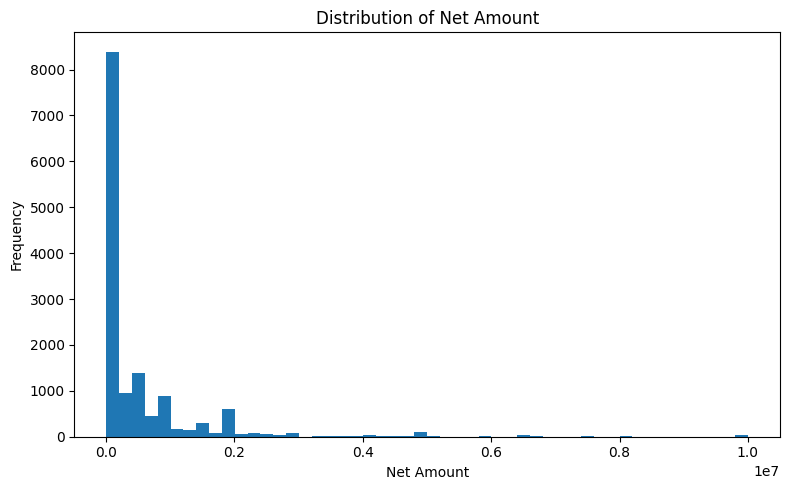

In [20]:
#distribusi jumlah transaksi
plt.figure(figsize=(8,5))
plt.hist(df['net_amount'], bins=50)
plt.xlabel("Net Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Net Amount")
plt.tight_layout()
plt.show()

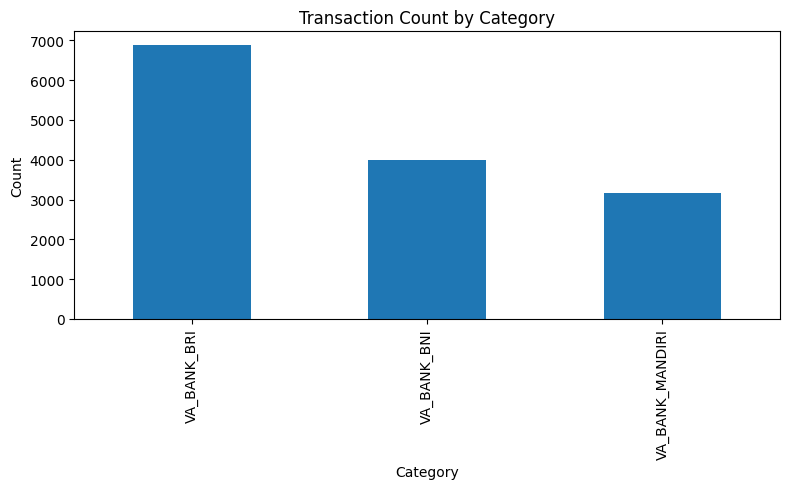

In [21]:
#jumlah transaksi per kategori
plt.figure(figsize=(8,5))
df['category'].value_counts().plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Transaction Count by Category")
plt.tight_layout()
plt.show()

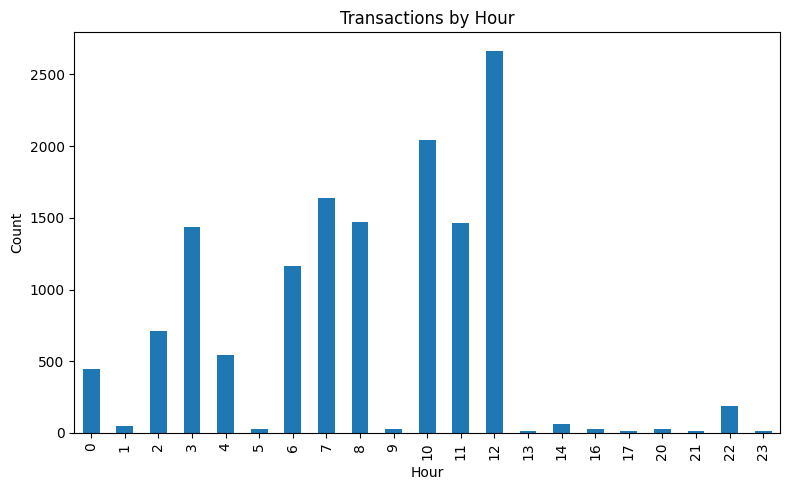

In [22]:
#transaksi per jam
plt.figure(figsize=(8,5))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Transactions by Hour")
plt.tight_layout()
plt.show()

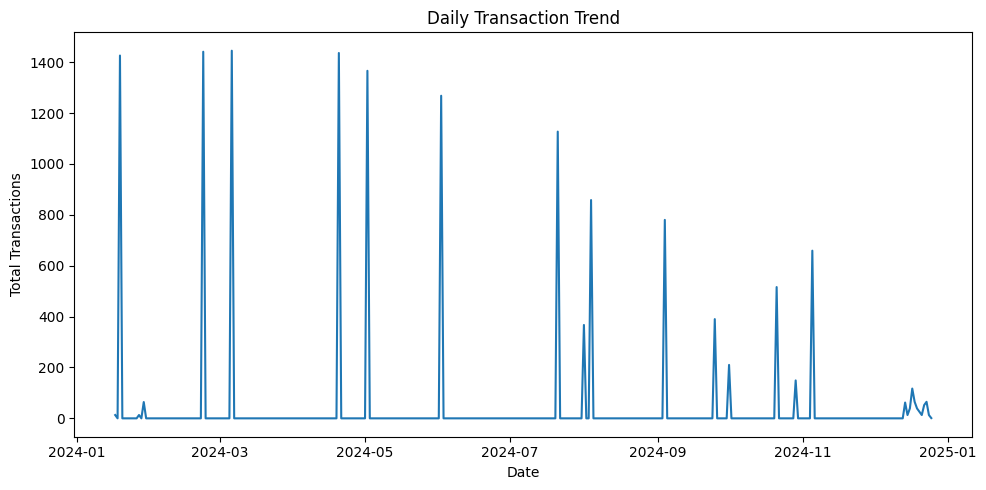

In [23]:
#transaksi overtime
df_daily = df.resample('D', on='created_at').size()

plt.figure(figsize=(10,5))
plt.plot(df_daily.index, df_daily.values)
plt.xlabel("Date")
plt.ylabel("Total Transactions")
plt.title("Daily Transaction Trend")
plt.tight_layout()
plt.show()

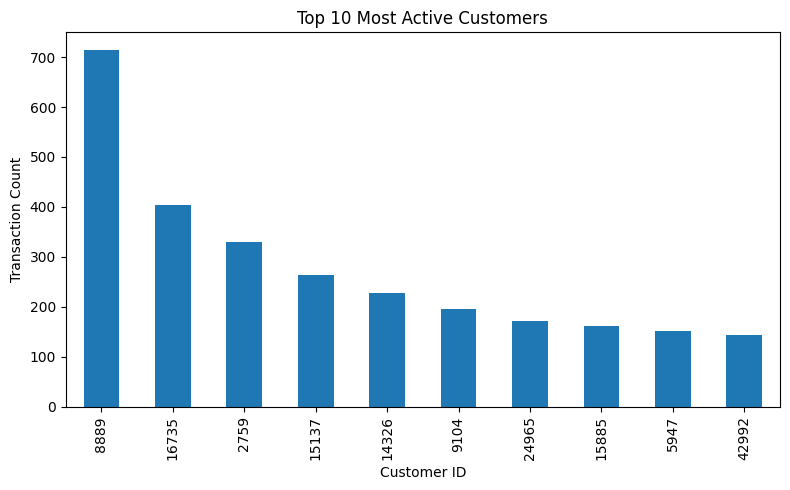

In [24]:
#top 5 customer by transaksi
top_customers = df['customer_id'].value_counts().head(10)

plt.figure(figsize=(8,5))
top_customers.plot(kind='bar')
plt.xlabel("Customer ID")
plt.ylabel("Transaction Count")
plt.title("Top 10 Most Active Customers")
plt.tight_layout()
plt.show()

In [27]:
from google.colab import files
files.download("Transaction Records Dataset from a Digital Payment System.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>